<img src="https://gallery.mailchimp.com/f98d5ac0a3fbbdcdda35136ab/images/2002af76-5fd4-4185-9d49-28558b6b8772.png">

# `sg-hdb-resale-bokeh` 
# Part 2: Model Training
What we have done so far is to extract data from the .csv files, do some preliminary transformation to the data, and then loading all of it into an SQLite database. The next step is to work towards creating a simple predictive model for us to predict the price of a resale HDB unit. The following cells will have us load data from the SQLite database, that we have previously created.

In [1]:
# Import relevant packages
import pandas as pd
from sqlalchemy import create_engine

In [2]:
# Initialise engine
sql_engine = create_engine('sqlite:///../data/processed/sg_hdb.db')
# Simple query to get the whole table
query = "SELECT * FROM sg_hdb_resale"
# Store result of query in a pandas dataframe
sg_hdb_resale_df = pd.read_sql_query(query, sql_engine)

In [4]:
# Observe result of query executed
sg_hdb_resale_df

,id,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town
0,0,174,improved,3 ROOM,60.0,1986,2015-01,70,255000.0,07 TO 09,ANG MO KIO AVE 4,ANG MO KIO
1,1,541,new generation,3 ROOM,68.0,1981,2015-01,65,275000.0,01 TO 03,ANG MO KIO AVE 10,ANG MO KIO
2,2,163,new generation,3 ROOM,69.0,1980,2015-01,64,285000.0,01 TO 03,ANG MO KIO AVE 4,ANG MO KIO
3,3,446,new generation,3 ROOM,68.0,1979,2015-01,63,290000.0,01 TO 03,ANG MO KIO AVE 10,ANG MO KIO
4,4,557,new generation,3 ROOM,68.0,1980,2015-01,64,290000.0,07 TO 09,ANG MO KIO AVE 10,ANG MO KIO
5,5,603,new generation,3 ROOM,67.0,1980,2015-01,64,290000.0,07 TO 09,ANG MO KIO AVE 5,ANG MO KIO
6,6,709,new generation,3 ROOM,68.0,1980,2015-01,64,290000.0,01 TO 03,ANG MO KIO AVE 8,ANG MO KIO
7,7,333,new generation,3 ROOM,68.0,1981,2015-01,65,293000.0,01 TO 03,ANG MO KIO AVE 1,ANG MO KIO
8,8,109,new generation,3 ROOM,67.0,1978,2015-01,62,300000.0,01 TO 03,ANG MO KIO AVE 4,ANG MO KIO
9,9,564,new generation,3 ROOM,68.0,1985,2015-01,69,307500.0,13 TO 15,ANG MO KIO AVE 3,ANG MO KIO


In [5]:
# Do the same for the other table containing the resale HDB price index
query = "SELECT * FROM sg_hdb_pi"
sg_hdb_pi = pd.read_sql_query(query, sql_engine)

In [6]:
sg_hdb_pi

,quarter,index
0,1990-Q1,24.3
1,1990-Q2,24.4
2,1990-Q3,25.0
3,1990-Q4,24.7
4,1991-Q1,24.9
5,1991-Q2,25.5
6,1991-Q3,25.2
7,1991-Q4,25.1
8,1992-Q1,25.8
9,1992-Q2,27.4


We are first going to inspect the data types of the imported dataframes.

In [7]:
sg_hdb_resale_df.dtypes

id                       int64
block                   object
flat_model              object
flat_type               object
floor_area_sqm         float64
lease_commence_date      int64
month                   object
remaining_lease          int64
resale_price           float64
storey_range            object
street_name             object
town                    object
dtype: object

In [8]:
sg_hdb_pi

,quarter,index
0,1990-Q1,24.3
1,1990-Q2,24.4
2,1990-Q3,25.0
3,1990-Q4,24.7
4,1991-Q1,24.9
5,1991-Q2,25.5
6,1991-Q3,25.2
7,1991-Q4,25.1
8,1992-Q1,25.8
9,1992-Q2,27.4


The next immediate set of steps would consist of associating a price index from `sg_hdb_pi` to each observation belonging to `sg_hdb_resale_df` and afterwards adjusting the resale price values according to the indexes. This is akin to a left join but currently there's no key to relate both dataframes.

We first have to create a column for `sg_hdb_resale_df` stating the year and quarter for each transaction/observation.

In [9]:
# Converting the 'month' column to a datetime format
sg_hdb_resale_df['month'] = pd.to_datetime(sg_hdb_resale_df.month, format='%Y-%m')
sg_hdb_resale_df.dtypes

id                              int64
block                          object
flat_model                     object
flat_type                      object
floor_area_sqm                float64
lease_commence_date             int64
month                  datetime64[ns]
remaining_lease                 int64
resale_price                  float64
storey_range                   object
street_name                    object
town                           object
dtype: object

In [10]:
sg_hdb_resale_df

,id,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town
0,0,174,improved,3 ROOM,60.0,1986,2015-01-01,70,255000.0,07 TO 09,ANG MO KIO AVE 4,ANG MO KIO
1,1,541,new generation,3 ROOM,68.0,1981,2015-01-01,65,275000.0,01 TO 03,ANG MO KIO AVE 10,ANG MO KIO
2,2,163,new generation,3 ROOM,69.0,1980,2015-01-01,64,285000.0,01 TO 03,ANG MO KIO AVE 4,ANG MO KIO
3,3,446,new generation,3 ROOM,68.0,1979,2015-01-01,63,290000.0,01 TO 03,ANG MO KIO AVE 10,ANG MO KIO
4,4,557,new generation,3 ROOM,68.0,1980,2015-01-01,64,290000.0,07 TO 09,ANG MO KIO AVE 10,ANG MO KIO
5,5,603,new generation,3 ROOM,67.0,1980,2015-01-01,64,290000.0,07 TO 09,ANG MO KIO AVE 5,ANG MO KIO
6,6,709,new generation,3 ROOM,68.0,1980,2015-01-01,64,290000.0,01 TO 03,ANG MO KIO AVE 8,ANG MO KIO
7,7,333,new generation,3 ROOM,68.0,1981,2015-01-01,65,293000.0,01 TO 03,ANG MO KIO AVE 1,ANG MO KIO
8,8,109,new generation,3 ROOM,67.0,1978,2015-01-01,62,300000.0,01 TO 03,ANG MO KIO AVE 4,ANG MO KIO
9,9,564,new generation,3 ROOM,68.0,1985,2015-01-01,69,307500.0,13 TO 15,ANG MO KIO AVE 3,ANG MO KIO


The following function will take in the year and month properties from the 'month' column to get a single output containing the year and quarter of the transaction.

In [11]:
def get_year_quarter(x):
    year = x.year
    # Floor division for the month property to get the month's quarter
    quarter = ((x.month-1)//3)+1
    # Combining the year and quarter properties into a single output
    year_quarter = '{}-Q{}'.format(year, quarter)
    return year_quarter

Here we iterate the function above to each observation using the `map` function.

In [12]:
sg_hdb_resale_df['resale_quarter'] = sg_hdb_resale_df['month'].map(get_year_quarter)

In [13]:
sg_hdb_resale_df

,id,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,resale_quarter
0,0,174,improved,3 ROOM,60.0,1986,2015-01-01,70,255000.0,07 TO 09,ANG MO KIO AVE 4,ANG MO KIO,2015-Q1
1,1,541,new generation,3 ROOM,68.0,1981,2015-01-01,65,275000.0,01 TO 03,ANG MO KIO AVE 10,ANG MO KIO,2015-Q1
2,2,163,new generation,3 ROOM,69.0,1980,2015-01-01,64,285000.0,01 TO 03,ANG MO KIO AVE 4,ANG MO KIO,2015-Q1
3,3,446,new generation,3 ROOM,68.0,1979,2015-01-01,63,290000.0,01 TO 03,ANG MO KIO AVE 10,ANG MO KIO,2015-Q1
4,4,557,new generation,3 ROOM,68.0,1980,2015-01-01,64,290000.0,07 TO 09,ANG MO KIO AVE 10,ANG MO KIO,2015-Q1
5,5,603,new generation,3 ROOM,67.0,1980,2015-01-01,64,290000.0,07 TO 09,ANG MO KIO AVE 5,ANG MO KIO,2015-Q1
6,6,709,new generation,3 ROOM,68.0,1980,2015-01-01,64,290000.0,01 TO 03,ANG MO KIO AVE 8,ANG MO KIO,2015-Q1
7,7,333,new generation,3 ROOM,68.0,1981,2015-01-01,65,293000.0,01 TO 03,ANG MO KIO AVE 1,ANG MO KIO,2015-Q1
8,8,109,new generation,3 ROOM,67.0,1978,2015-01-01,62,300000.0,01 TO 03,ANG MO KIO AVE 4,ANG MO KIO,2015-Q1
9,9,564,new generation,3 ROOM,68.0,1985,2015-01-01,69,307500.0,13 TO 15,ANG MO KIO AVE 3,ANG MO KIO,2015-Q1


In [14]:
# Current no. of observations
len(sg_hdb_resale_df)

790643

Since we only have the resale price index up until Q4 of 2018, we would have to filter out transactions recorded after 2018.

In [15]:
sg_hdb_resale_df = sg_hdb_resale_df[sg_hdb_resale_df['month'] < pd.to_datetime(2019, format='%Y')]
# Now the current no. of observations has changed since some have been filtered out
len(sg_hdb_resale_df)

789085

Now that we have the common column to match both `sg_hdb_resale_df` with `sg_hdb_pi`, we would like to do a left join.

In [16]:
sg_hdb_resale_df = pd.merge(sg_hdb_resale_df, sg_hdb_pi, left_on='resale_quarter', right_on='quarter', how='left')

In [17]:
sg_hdb_resale_df

,id,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,resale_quarter,quarter,index
0,0,174,improved,3 ROOM,60.0,1986,2015-01-01,70,255000.0,07 TO 09,ANG MO KIO AVE 4,ANG MO KIO,2015-Q1,2015-Q1,135.6
1,1,541,new generation,3 ROOM,68.0,1981,2015-01-01,65,275000.0,01 TO 03,ANG MO KIO AVE 10,ANG MO KIO,2015-Q1,2015-Q1,135.6
2,2,163,new generation,3 ROOM,69.0,1980,2015-01-01,64,285000.0,01 TO 03,ANG MO KIO AVE 4,ANG MO KIO,2015-Q1,2015-Q1,135.6
3,3,446,new generation,3 ROOM,68.0,1979,2015-01-01,63,290000.0,01 TO 03,ANG MO KIO AVE 10,ANG MO KIO,2015-Q1,2015-Q1,135.6
4,4,557,new generation,3 ROOM,68.0,1980,2015-01-01,64,290000.0,07 TO 09,ANG MO KIO AVE 10,ANG MO KIO,2015-Q1,2015-Q1,135.6
5,5,603,new generation,3 ROOM,67.0,1980,2015-01-01,64,290000.0,07 TO 09,ANG MO KIO AVE 5,ANG MO KIO,2015-Q1,2015-Q1,135.6
6,6,709,new generation,3 ROOM,68.0,1980,2015-01-01,64,290000.0,01 TO 03,ANG MO KIO AVE 8,ANG MO KIO,2015-Q1,2015-Q1,135.6
7,7,333,new generation,3 ROOM,68.0,1981,2015-01-01,65,293000.0,01 TO 03,ANG MO KIO AVE 1,ANG MO KIO,2015-Q1,2015-Q1,135.6
8,8,109,new generation,3 ROOM,67.0,1978,2015-01-01,62,300000.0,01 TO 03,ANG MO KIO AVE 4,ANG MO KIO,2015-Q1,2015-Q1,135.6
9,9,564,new generation,3 ROOM,68.0,1985,2015-01-01,69,307500.0,13 TO 15,ANG MO KIO AVE 3,ANG MO KIO,2015-Q1,2015-Q1,135.6


After the join, we would like to apply the indexes to the recorded resale prices. Create the function that is able to do this for every observation.

In [18]:
def adjust_resale_price(x):
    adjusted_price = (x['resale_price']/x['index'])*100
    return adjusted_price

Create a new column 'adjusted_resale_price' to contain these new derived values.

In [19]:
sg_hdb_resale_df['adjusted_resale_price'] = adjust_resale_price(sg_hdb_resale_df)

In [23]:
sg_hdb_resale_df.head()

,id,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,resale_quarter,quarter,index,adjusted_resale_price
0,0,174,improved,3 ROOM,60.0,1986,2015-01-01,70,255000.0,07 TO 09,ANG MO KIO AVE 4,ANG MO KIO,2015-Q1,2015-Q1,135.6,188053.097345
1,1,541,new generation,3 ROOM,68.0,1981,2015-01-01,65,275000.0,01 TO 03,ANG MO KIO AVE 10,ANG MO KIO,2015-Q1,2015-Q1,135.6,202802.359882
2,2,163,new generation,3 ROOM,69.0,1980,2015-01-01,64,285000.0,01 TO 03,ANG MO KIO AVE 4,ANG MO KIO,2015-Q1,2015-Q1,135.6,210176.991150
3,3,446,new generation,3 ROOM,68.0,1979,2015-01-01,63,290000.0,01 TO 03,ANG MO KIO AVE 10,ANG MO KIO,2015-Q1,2015-Q1,135.6,213864.306785
4,4,557,new generation,3 ROOM,68.0,1980,2015-01-01,64,290000.0,07 TO 09,ANG MO KIO AVE 10,ANG MO KIO,2015-Q1,2015-Q1,135.6,213864.306785


Now that we have adjusted the resale prices according to the allocated price indexes, we are now going to build a simple linear regression model that allows us to predict a resale price of a unit, given a value of `floor_area_sqm`.

In [24]:
sg_hdb_resale_df

,id,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town,resale_quarter,quarter,index,adjusted_resale_price
0,0,174,improved,3 ROOM,60.0,1986,2015-01-01,70,255000.0,07 TO 09,ANG MO KIO AVE 4,ANG MO KIO,2015-Q1,2015-Q1,135.6,188053.097345
1,1,541,new generation,3 ROOM,68.0,1981,2015-01-01,65,275000.0,01 TO 03,ANG MO KIO AVE 10,ANG MO KIO,2015-Q1,2015-Q1,135.6,202802.359882
2,2,163,new generation,3 ROOM,69.0,1980,2015-01-01,64,285000.0,01 TO 03,ANG MO KIO AVE 4,ANG MO KIO,2015-Q1,2015-Q1,135.6,210176.991150
3,3,446,new generation,3 ROOM,68.0,1979,2015-01-01,63,290000.0,01 TO 03,ANG MO KIO AVE 10,ANG MO KIO,2015-Q1,2015-Q1,135.6,213864.306785
4,4,557,new generation,3 ROOM,68.0,1980,2015-01-01,64,290000.0,07 TO 09,ANG MO KIO AVE 10,ANG MO KIO,2015-Q1,2015-Q1,135.6,213864.306785
5,5,603,new generation,3 ROOM,67.0,1980,2015-01-01,64,290000.0,07 TO 09,ANG MO KIO AVE 5,ANG MO KIO,2015-Q1,2015-Q1,135.6,213864.306785
6,6,709,new generation,3 ROOM,68.0,1980,2015-01-01,64,290000.0,01 TO 03,ANG MO KIO AVE 8,ANG MO KIO,2015-Q1,2015-Q1,135.6,213864.306785
7,7,333,new generation,3 ROOM,68.0,1981,2015-01-01,65,293000.0,01 TO 03,ANG MO KIO AVE 1,ANG MO KIO,2015-Q1,2015-Q1,135.6,216076.696165
8,8,109,new generation,3 ROOM,67.0,1978,2015-01-01,62,300000.0,01 TO 03,ANG MO KIO AVE 4,ANG MO KIO,2015-Q1,2015-Q1,135.6,221238.938053
9,9,564,new generation,3 ROOM,68.0,1985,2015-01-01,69,307500.0,13 TO 15,ANG MO KIO AVE 3,ANG MO KIO,2015-Q1,2015-Q1,135.6,226769.911504


In [25]:


sg_hdb_resale_df.isnull().sum()

id                       0
block                    0
flat_model               0
flat_type                0
floor_area_sqm           0
lease_commence_date      0
month                    0
remaining_lease          0
resale_price             0
storey_range             0
street_name              0
town                     0
resale_quarter           0
quarter                  0
index                    0
adjusted_resale_price    0
dtype: int64

First step is to create 2 separate series containing the predictor and response values to train our model on.

In [26]:
sg_hdb_X = sg_hdb_resale_df['floor_area_sqm'].values
sg_hdb_Y = sg_hdb_resale_df['adjusted_resale_price'].values

In [27]:
# Import the relevant packages
import numpy as np
import sklearn
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle
from matplotlib import pyplot as plt

When training a model, we have to create a train-test split to check the accuracy/performance of the model.

In [28]:
sg_hdb_X_train, sg_hdb_X_test, sg_hdb_Y_train, sg_hdb_Y_test = sklearn.model_selection.train_test_split(
    sg_hdb_X, sg_hdb_Y,
    test_size=0.3, random_state=7
)

In [29]:
# Reshaping needed when using a single variable for predictor
sg_hdb_X_train = sg_hdb_X_train.reshape(-1,1)
sg_hdb_X_test = sg_hdb_X_test.reshape(-1,1)

We are gonna create a simple linear regression model (a.k.a best fit line) from the dataset.

In [30]:
# Initialise model
lm = LinearRegression()
# Create model from the train sets
lm.fit(sg_hdb_X_train, sg_hdb_Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
# To observe the model's coefficients
print('Coefficients: \n X:', lm.coef_,'\n c:', lm.intercept_)

Coefficients: 
 X: [4124.25258523] 
 c: -70601.2514640629


Y = mX + C

After creating the model, we are going to evaluate its performance by pitting it against the test set.

First, we use the linear model to provide us with the predictions derived from the values in the test set.

In [32]:
sg_hdb_Y_pred = lm.predict(sg_hdb_X_test)
sg_hdb_Y_pred

array([275835.96569547, 193350.91399082, 428433.31134907, ...,
       209847.92433175, 354196.76481489, 230469.18725791])

Thereafter, we are going to calculate the errors, pitting the predicted values with actual historical values.

In [33]:
# Examine fitness of model
r2_score(sg_hdb_Y_test, sg_hdb_Y_pred)

0.7018080128034911

Why does the model have such a score? Well, let's check how the linear model was created.

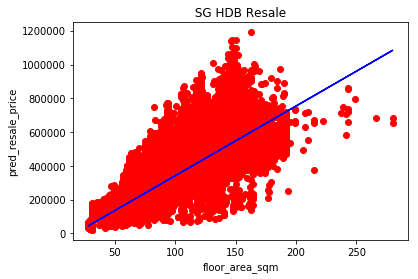

In [34]:
plt.scatter(sg_hdb_X_test, sg_hdb_Y_test, color='red')
plt.plot(sg_hdb_X_test, sg_hdb_Y_pred, color='blue')
plt.title(" SG HDB Resale ")
plt.xlabel('floor_area_sqm')
plt.ylabel("pred_resale_price")
plt.show()

A heavily sparsed set of data points can hardly be described by a single linear regression model, hence the low value of fitness.

For the sake of this exercise, let us just proceed and export (serialise) this model for deployment. Save the model under a name, for example like the one below: 'sg_hdb_lm_v1.pkl'

In [35]:
# Specify output location of model to be serialised
file_loc_name = '../models/sg_hdb_lm_v1.pkl'
pickle.dump(lm, open(file_loc_name, 'wb'))

Here, we just do a quick test by loading the model and then doing a single prediction to it.

In [37]:
# Test loading saved model
loaded_model = pickle.load(open(file_loc_name, 'rb'))
# Create a test value for test prediction
# Test value has to be contained in a numpy array format hence np.array
test_val = np.array(63)
# Reshaping value before feeding to .predict function
test_val_reshape = test_val.reshape(-1, 1)
# Conduct prediction
result = loaded_model.predict(test_val_reshape)
# Print out result
print(result)

[189226.66140559]


Now that we have exported this model, time to create a simple API (Application Programming Interface) that allows us to use the model, potentially remotely. On to [deployment](./sg-hdb-part3-basic-deployment-reference.ipynb)!